# Token counts within contigs analysis

## Read bed files

In [1]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files')

bedDfList = []
for bedFile in os.listdir(bedDir):
    bedDfList.append(pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score']))

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score
0,1,0,6,TTTTCTT,0.000520
1,1,7,9,ACC,-0.003003
2,1,10,13,GACA,0.007947
3,1,14,18,AGAAT,-0.005417
4,1,19,25,TAATTAT,0.005031
...,...,...,...,...,...
2022283,39,75,81,TTTACTT,-0.029290
2022284,39,82,89,TTGTAAAT,-0.018211
2022285,39,90,92,GAG,-0.026377
2022286,39,93,98,CATTTG,-0.018669


## Calculate contig counts

In [2]:
contigCountsDf = bedDf[['contig_id']].value_counts().reset_index().sort_values(by='contig_id')
contigCountsDf

,contig_id,count
11,1,51105
13,2,50923
12,3,51009
7,4,51340
9,5,51230
...,...,...
180,180,19
182,181,19
177,182,20
183,183,19


## Plot

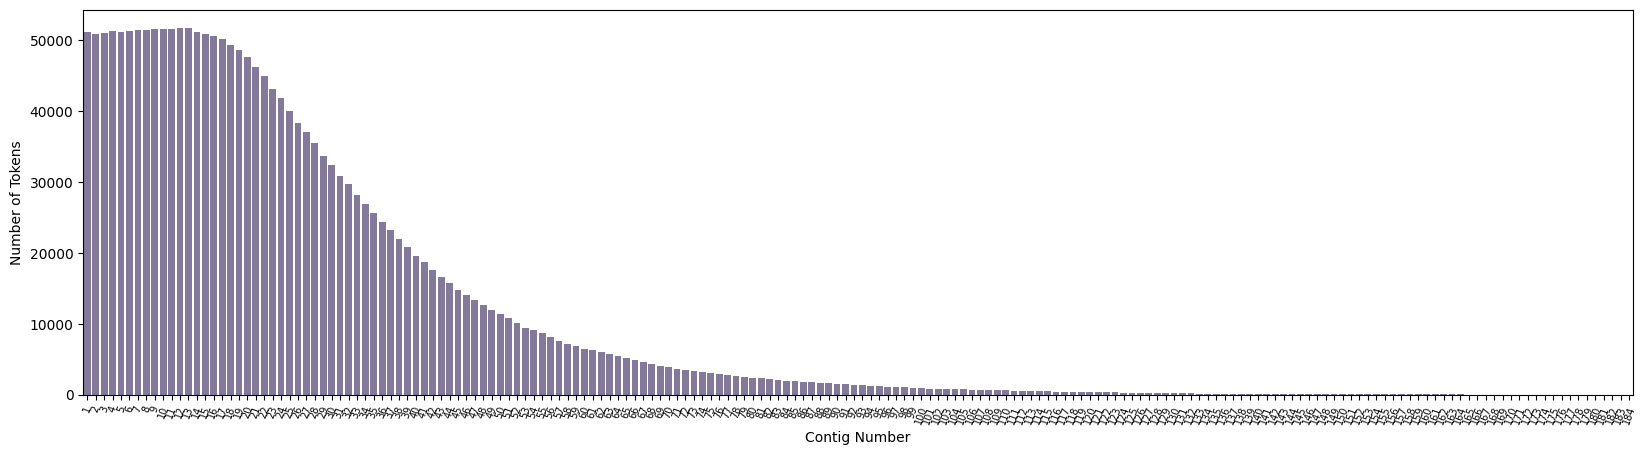

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,5))

ax = sns.barplot(contigCountsDf, x="contig_id", y="count", color='#8174A0')

plt.xlabel('Contig Number')
plt.xticks(fontsize=7, rotation=70)
plt.ylabel('Number of Tokens')

plt.show()